In [0]:
#We will use euclidean distance(also can use Manhattan distance)

In [0]:
import numpy as np #Example to show how to find euclidean Distance

a = np.asarray([2,3,1]) #asarray used to save memory
b = np.asarray([1,4,8])

l2 = (np.sum((b-a)**2))**0.5
l2

7.14142842854285

In [0]:
l1 = np.sum(abs(b-a))  # Example how to find Manhattan distance
l1

9

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mean1 = np.array([1,0]) #first value is mean of x, second mean of y
cov1 = np.array([[1,.1],[.1,1.2]]) #co-variance: 2-d variance   first value is horizontal spread and last val is vertical spread
dist1 = np.random.multivariate_normal(mean1,cov1,500) #middle values to change diagonal in cov
print(dist1.shape)

(500, 2)


In [0]:
mean2 = np.array([4,5])
cov2 = np.array([[1,.1],[.1,1.2]]) 
dist2 = np.random.multivariate_normal(mean2,cov2,500)  #Generating data

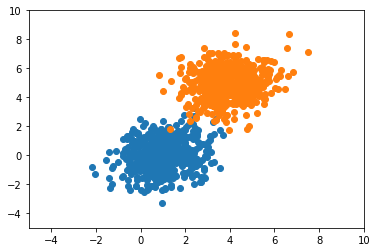

In [0]:
plt.xlim(-5,10)  #Plotting data
plt.ylim(-5,10)
plt.scatter(dist1[:,0],dist1[:,-1])


plt.scatter(dist2[:,0],dist2[:,-1])
plt.show()

In [0]:
data = np.zeros((1000,3))  #Stacking two cluster of data into one numpy array

data[0:500,:2] = dist1
data[500:,:2] = dist2
data[500:,2] = 1

print(data.shape)

data.mean(axis=0)

(1000, 3)


array([2.48691805, 2.49431651, 0.5       ])

In [0]:
def distance(a,b):
    return ((np.sum((b-a)**2))**0.5)



In [0]:
np.random.shuffle(data)  #shuffle data randomly
data[:20]

array([[ 5.45928836,  4.75435898,  1.        ],
       [ 2.08463907, -0.22194625,  0.        ],
       [ 3.62084   ,  5.9531604 ,  1.        ],
       [ 1.5006701 , -1.53121833,  0.        ],
       [-0.16501711,  0.7687667 ,  0.        ],
       [ 4.02802568,  4.34089449,  1.        ],
       [ 4.88150564,  4.79039993,  1.        ],
       [ 2.93662523,  5.05854678,  1.        ],
       [-0.06067697, -0.80162642,  0.        ],
       [ 5.41163966,  5.52693563,  1.        ],
       [ 2.91999888,  0.18821082,  0.        ],
       [ 4.96331256,  6.70125639,  1.        ],
       [ 5.29580287,  4.562741  ,  1.        ],
       [ 0.41942691, -1.01468383,  0.        ],
       [-0.54850705, -3.09692083,  0.        ],
       [ 3.29270956,  4.17473885,  1.        ],
       [ 2.15159684,  2.07689023,  0.        ],
       [ 4.0866146 ,  6.11150559,  1.        ],
       [ 4.29823997,  4.60689506,  1.        ],
       [ 0.80201759, -0.81862734,  0.        ]])

In [0]:
def knn(x_train,y_train,test_point,k=7):  #KNN Algorithm
    distances = []
    m = x_train.shape[0]
    for i in range(m):
        d = distance(x_train[i],test_point)
        distances.append([d,y_train[i]])
    sorted_labels = sorted(distances,key=lambda r : r[0])
    neighbors = np.asarray(sorted_labels)[:k,-1]
    freq = np.unique(neighbors,return_counts=True)
    index = freq[1].argmax()
    return freq[0][index]
    

In [0]:
x_train = data[:,:2]
y_train = data[:,-1]

test_point = np.array([2,3])

knn(x_train,y_train,test_point)

1.0

In [0]:
x_train = data[:750,:2]  #Splitting data into training and testing
y_train = data[:750,-1]

x_test = data[750:,:2]
y_test = data[750:,-1]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [0]:
def acc(k):  #Accuracy Function
    predictions = []
    m = x_test.shape[0]
    for i in range(m):
        test_point = x_test[i]
        pred_label = knn(x_train,y_train,test_point,k)
        predictions.append(pred_label)
    preds = np.asarray(predictions)
    return 100*(preds == y_test).sum()/m 
        

In [0]:
for k in range(1,10):
    print(f"For k={k} Acc={acc(k)}")
    


For k=1 Acc=99.2
For k=2 Acc=99.2
For k=3 Acc=99.6
For k=4 Acc=99.2
For k=5 Acc=99.2
For k=6 Acc=98.8
For k=7 Acc=99.6
For k=8 Acc=99.6
For k=9 Acc=99.6
